In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from fancyimpute import IterativeImputer
import joblib

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data = pd.read_csv('accepted_2007_to_2018Q4.csv')

C:\Users\Vinay\AppData\Local\Temp\ipykernel_5888\2567533633.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('accepted_2007_to_2018Q4.csv')


In [5]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [6]:
data = data.loc[:, ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',\
                    'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'earliest_cr_line', 'open_acc',\
                    'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies']]

In [7]:
data = data[data['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [8]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,debt_consolidation,Debt consolidation,190xx,PA,5.91,Aug-2003,7.0,0.0,2765.0,29.7,13.0,w,Individual,1.0,0.0
1,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,small_business,Business,577xx,SD,16.06,Dec-1999,22.0,0.0,21470.0,19.2,38.0,w,Individual,4.0,0.0
2,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,home_improvement,NaN,605xx,IL,10.78,Aug-2000,6.0,0.0,7869.0,56.2,18.0,w,Joint App,5.0,0.0
4,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,major_purchase,Major purchase,174xx,PA,25.37,Jun-1998,12.0,0.0,21929.0,64.5,35.0,w,Individual,6.0,0.0
5,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,RENT,34000.0,Source Verified,Dec-2015,Fully Paid,debt_consolidation,Debt consolidation,300xx,GA,10.20,Oct-1987,5.0,0.0,8822.0,68.4,6.0,w,Individual,0.0,0.0


In [9]:
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               85785
emp_length              78511
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                   16660
zip_code                    1
addr_state                  0
dti                       374
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                857
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                47281
pub_rec_bankruptcies      697
dtype: int64

# EDA

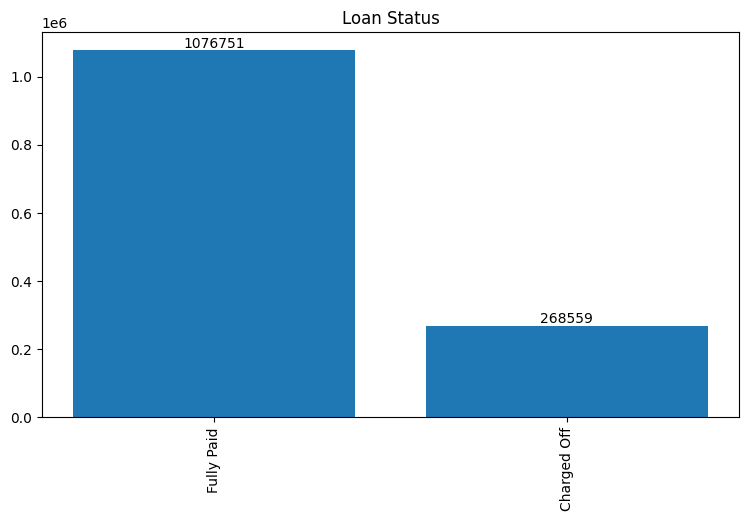

In [10]:
df = data.loan_status.value_counts()
plt.figure(figsize = (9, 5))
bar = plt.bar(df.index, df.values)
plt.bar_label(bar, df.values)
plt.xticks(rotation=90)

plt.title('Loan Status')
plt.show()

<Axes: >

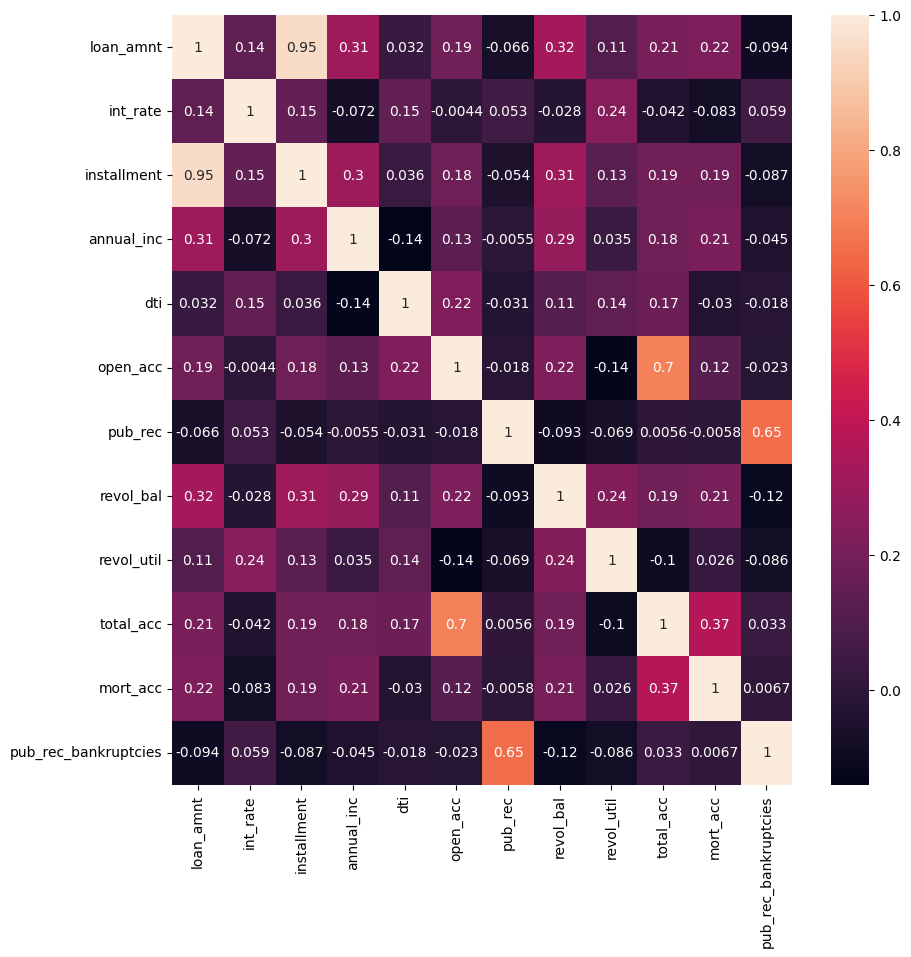

In [11]:
plt.figure(figsize = (10 ,10))
sns.heatmap(data.corr(numeric_only=True), annot = True)

There is a strong correlation between installment and loan amount

Text(0.5, 1.0, 'Installment by Loan Status')

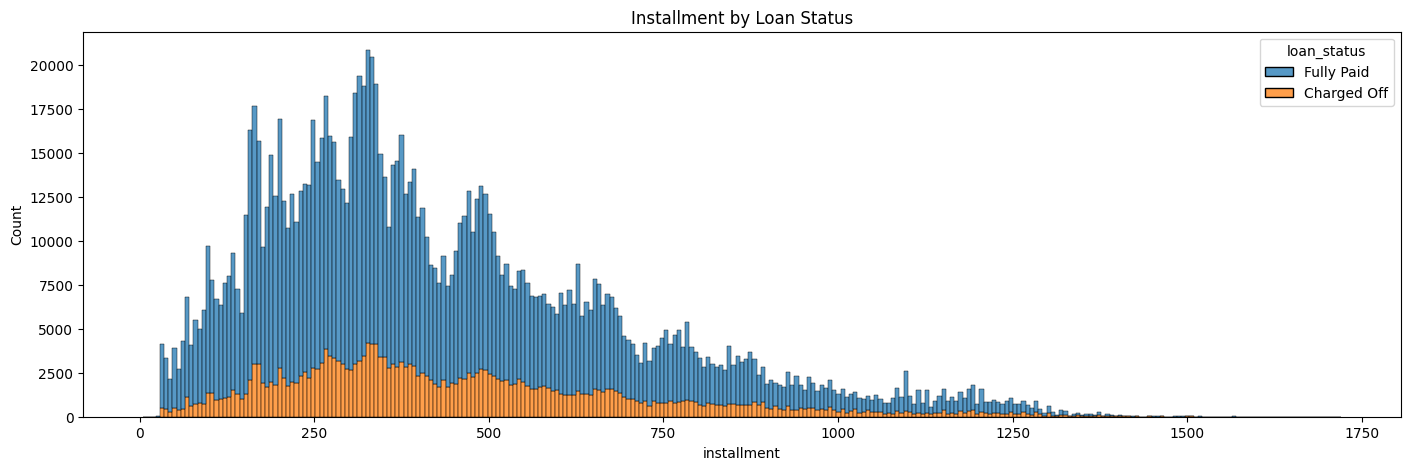

In [12]:
#loan amount by installment
plt.figure(figsize = (17, 5))
sns.histplot(
    data,
    x="installment", hue = 'loan_status',
    multiple="stack",
)
plt.title('Installment by Loan Status')
#ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())

Text(0.5, 1.0, 'Loan Amount by Loan Status')

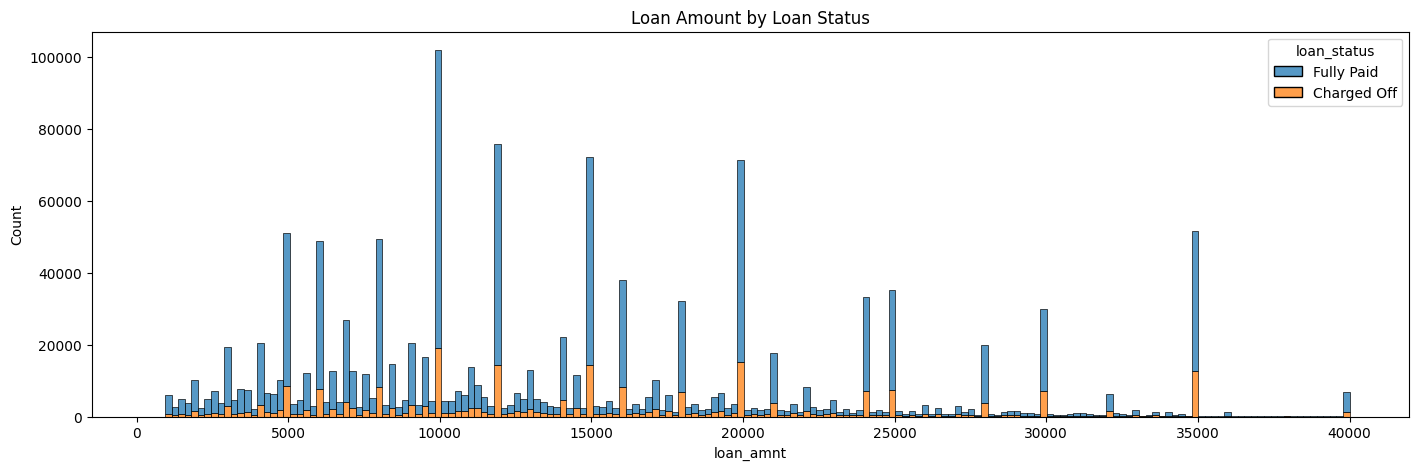

In [13]:
#loan amount by loanStatus
plt.figure(figsize = (17, 5))
sns.histplot(
    data,
    x="loan_amnt", hue = 'loan_status',
    multiple="stack",
)
plt.title('Loan Amount by Loan Status')
#ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())

([0, 1], [Text(0, 0, 'Fully Paid'), Text(1, 0, 'Charged Off')])

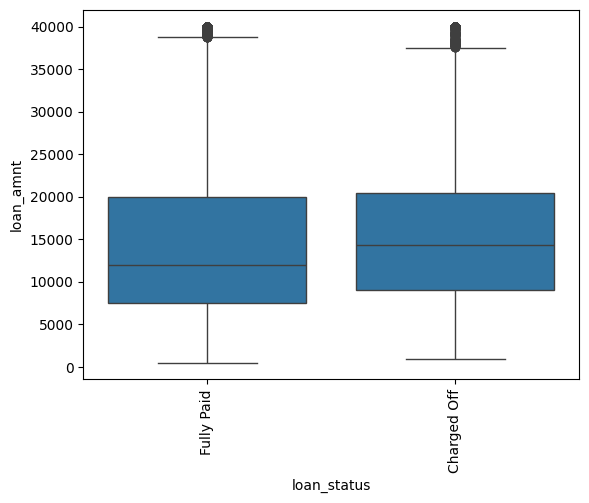

In [14]:
sns.boxplot(data = data, x = 'loan_status', y = 'loan_amnt')
plt.xticks(rotation = 90)

([0, 1], [Text(0, 0, 'Fully Paid'), Text(1, 0, 'Charged Off')])

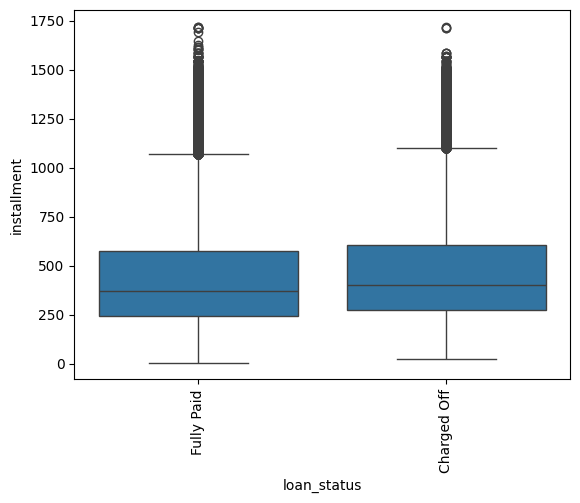

In [15]:
sns.boxplot(data = data, x = 'loan_status', y = 'installment')
plt.xticks(rotation = 90)

In [16]:
data.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,15565.055444,8814.560077,900.0,9000.0,14350.0,20400.0,40000.0
Fully Paid,1076751.0,14134.369808,8669.028973,500.0,7500.0,12000.0,20000.0,40000.0


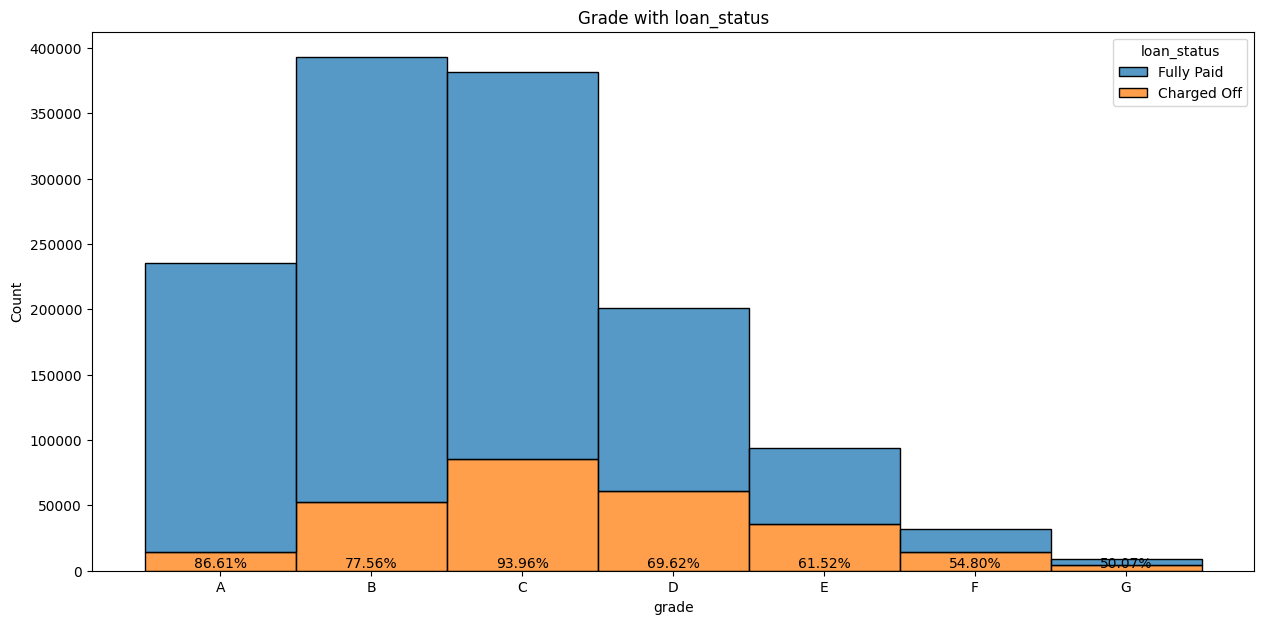

In [17]:
#grade and #subgrade
plt.figure(figsize = (15, 7))
df = data.sort_values(by = 'grade')

fully_paid_df = df[df['loan_status'] == 'Fully Paid']

percentage_fully_paid = (fully_paid_df['grade'].value_counts() / df['grade'].value_counts()) * 100

sns.histplot(data = df, x = 'grade', hue = 'loan_status', multiple = 'stack')
for i, p in enumerate(percentage_fully_paid):
    plt.text(i, p, f'{p:.2f}%', ha='center', va='bottom')

plt.title('Grade with loan_status')
plt.show()

we can see that the percentage of fully paid customer decreases as the grade decreases.

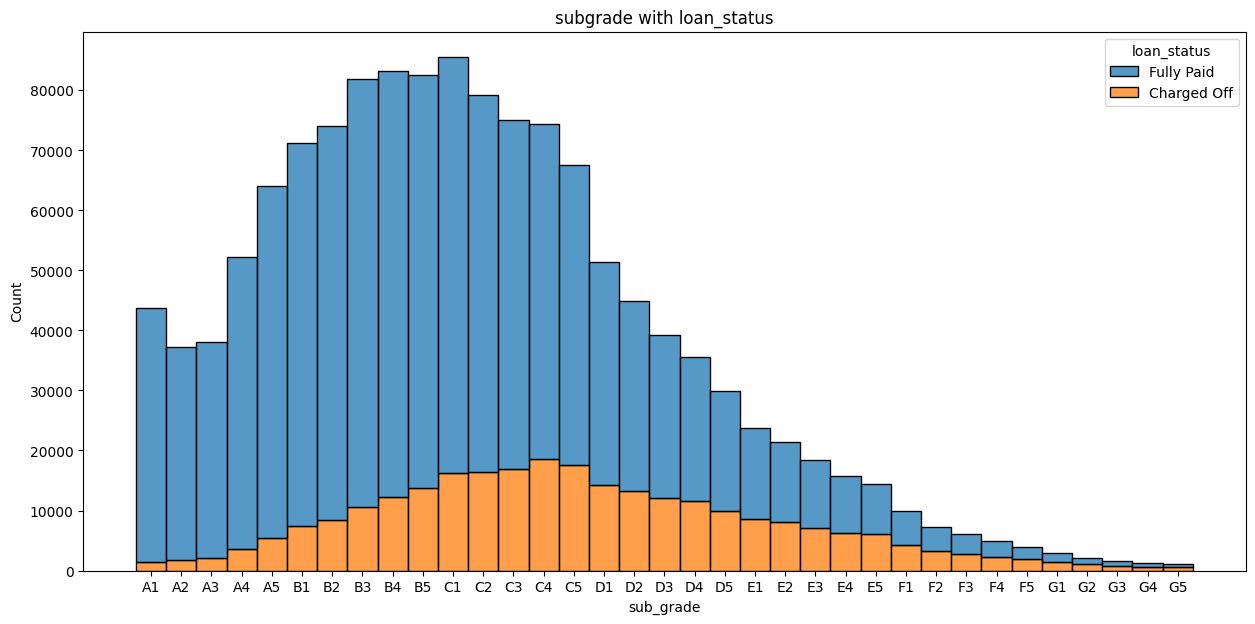

In [18]:
plt.figure(figsize = (15, 7))
df = data.sort_values(by = 'sub_grade')
sns.histplot(data = df, x = 'sub_grade', hue = 'loan_status', multiple = 'stack')
plt.title('subgrade with loan_status')
plt.show()

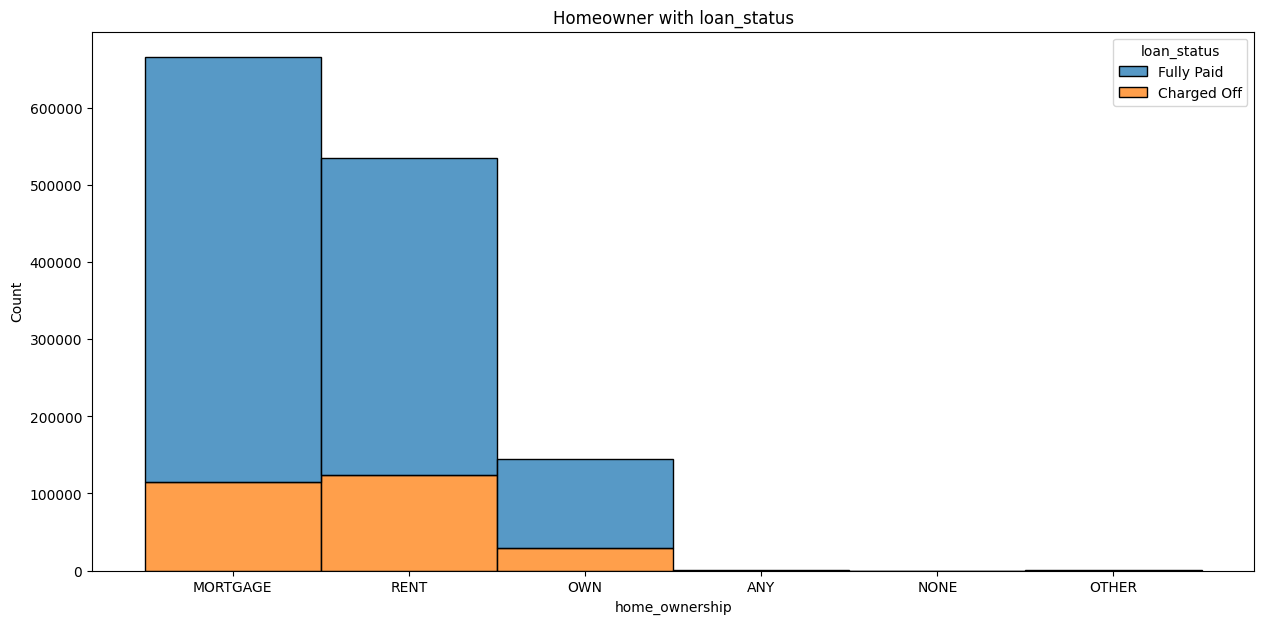

In [19]:

#lets find the loan status of home ownerships
plt.figure(figsize = (15, 7))
sns.histplot(data = data, x = 'home_ownership', hue = 'loan_status', multiple = 'stack')
plt.title('Homeowner with loan_status')
plt.show()

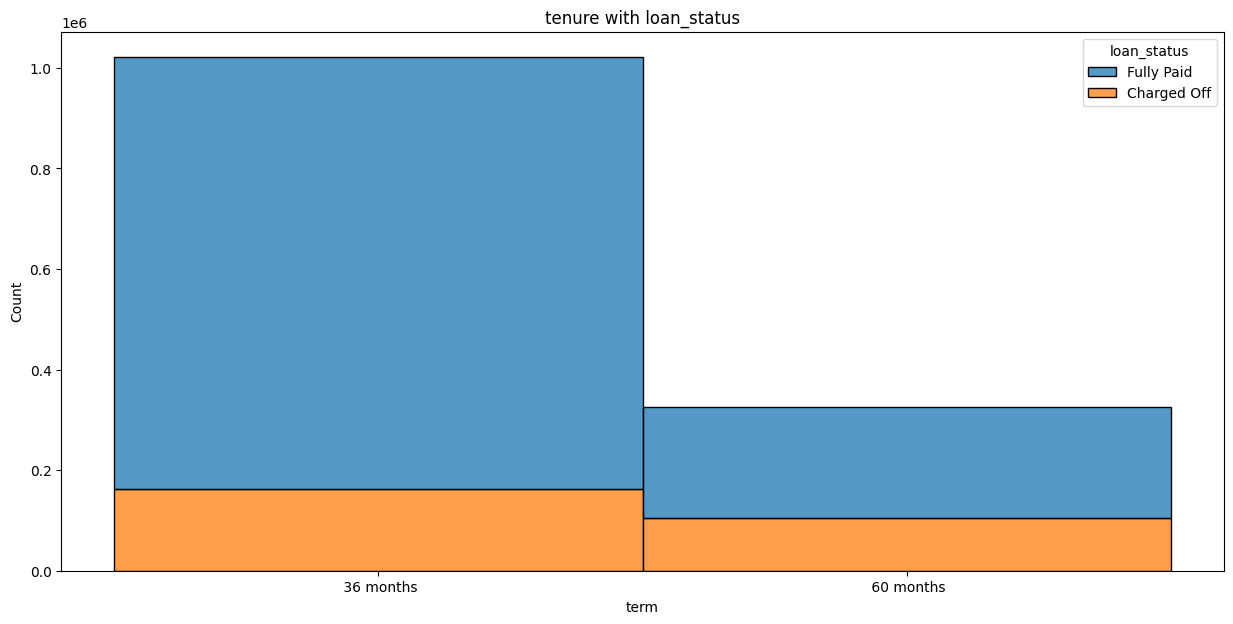

In [20]:
#lets find the loan status of tenure of loan
plt.figure(figsize = (15, 7))
sns.histplot(data = data, x = 'term', hue = 'loan_status', multiple = 'stack')
plt.title('tenure with loan_status')
plt.show()

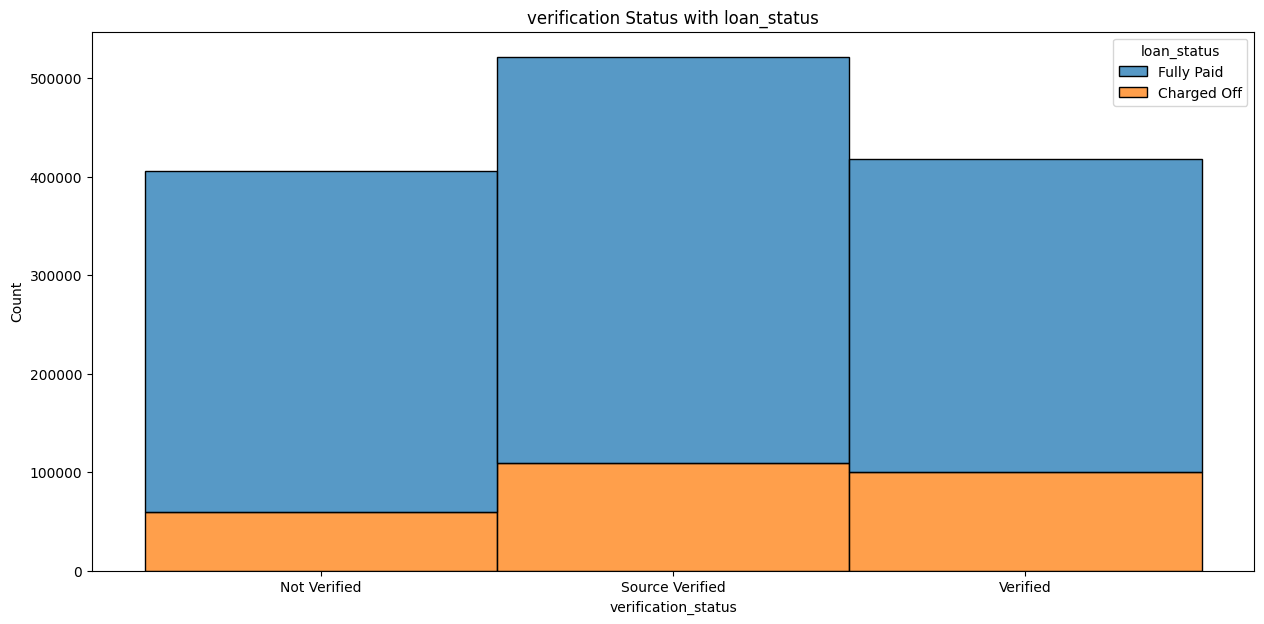

In [21]:

#lets find the loan status of verification
plt.figure(figsize = (15, 7))
sns.histplot(data = data, x = 'verification_status', hue = 'loan_status', multiple = 'stack')
plt.title('verification Status with loan_status')
plt.show()

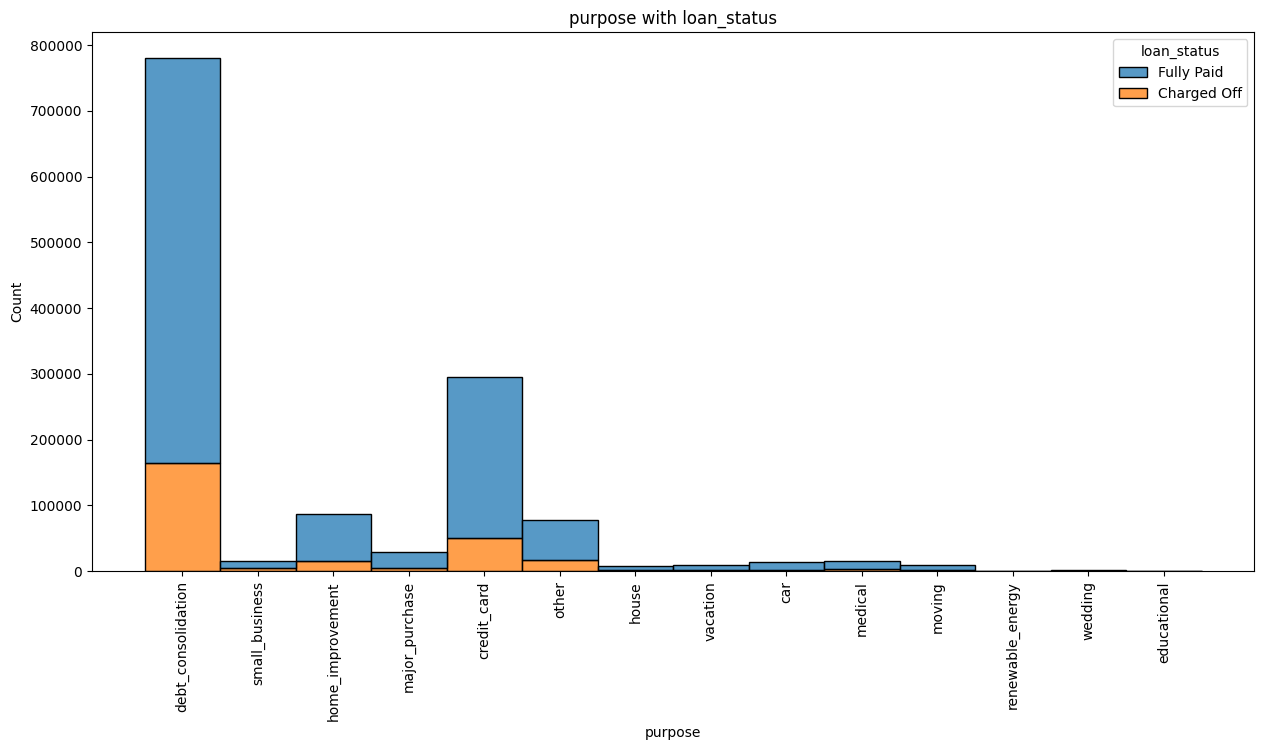

In [22]:
#lets find the loan status of purpose of loan
plt.figure(figsize = (15, 7))
sns.histplot(data = data, x = 'purpose', hue = 'loan_status', multiple = 'stack')
plt.xticks(rotation = 90)
plt.title('purpose with loan_status')
plt.show()

Text(0.5, 1.0, 'interest_rate with loan_status')

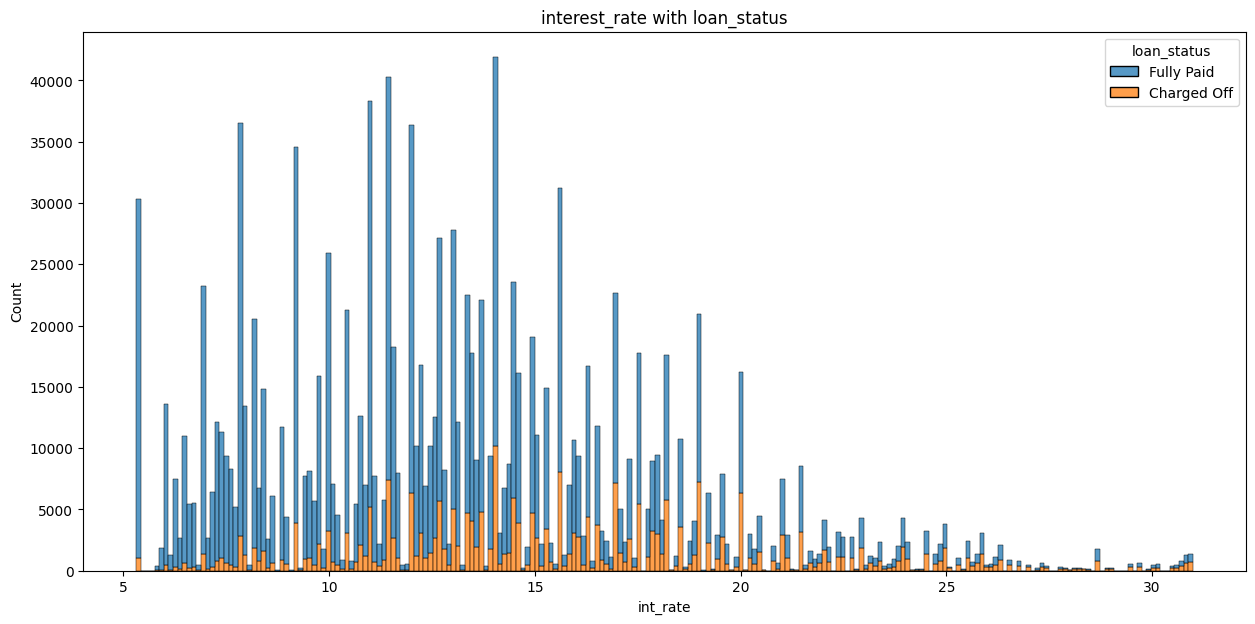

In [23]:
#lets find the loan status of interest rate
plt.figure(figsize = (15, 7))
sns.histplot(data = data, x = 'int_rate', hue = 'loan_status', multiple = 'stack')
plt.title('interest_rate with loan_status')

In [24]:
data.loc[data.annual_inc >= 1000000, 'loan_status'].value_counts()

loan_status
Fully Paid     294
Charged Off     45
Name: count, dtype: int64

In [25]:
data.loc[data.annual_inc >= 250000, 'loan_status'].value_counts()

loan_status
Fully Paid     14269
Charged Off     2214
Name: count, dtype: int64

% of charged off is higher (14%) with annual income greater than 250K vs 12% in income greater that 1 million.

Text(0.5, 1.0, 'dti with loan_status')

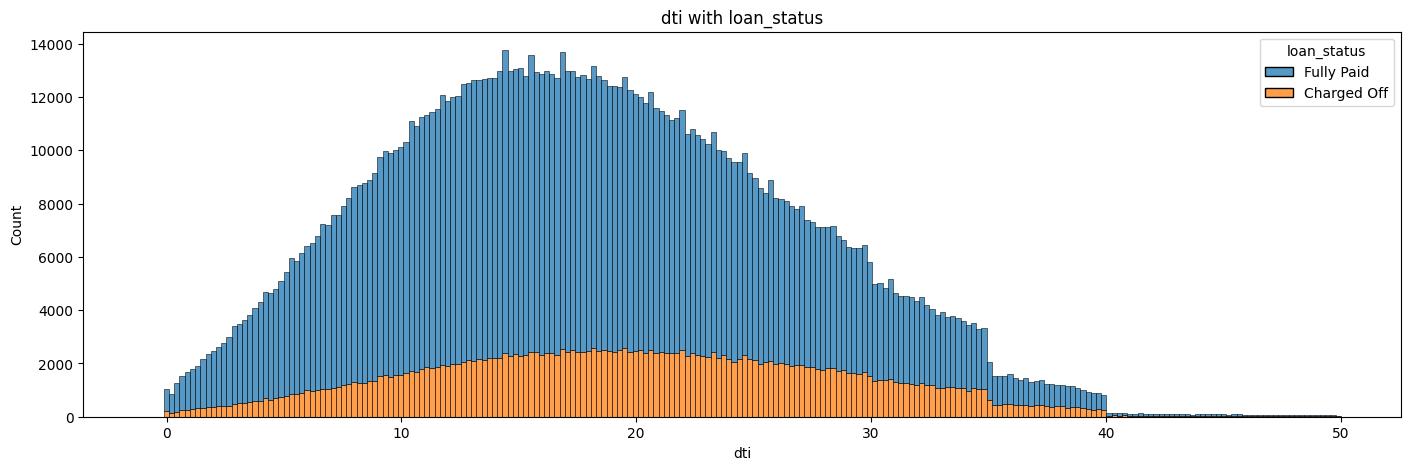

In [26]:
df = data[data['dti'] <= 50]
plt.figure(figsize = (17,5))
sns.histplot(data = df, x = 'dti', hue = 'loan_status', multiple = 'stack')
plt.title('dti with loan_status')

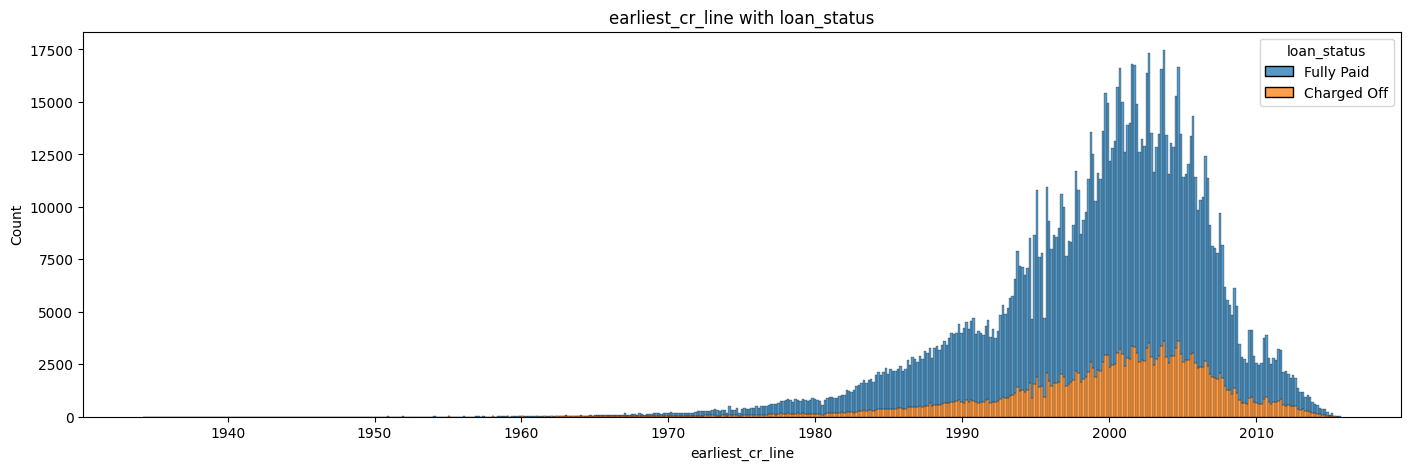

In [27]:
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%Y')
plt.figure(figsize = (17,5))
sns.histplot(data = data, x = 'earliest_cr_line', hue = 'loan_status', multiple = 'stack')
plt.title('earliest_cr_line with loan_status')
plt.show()

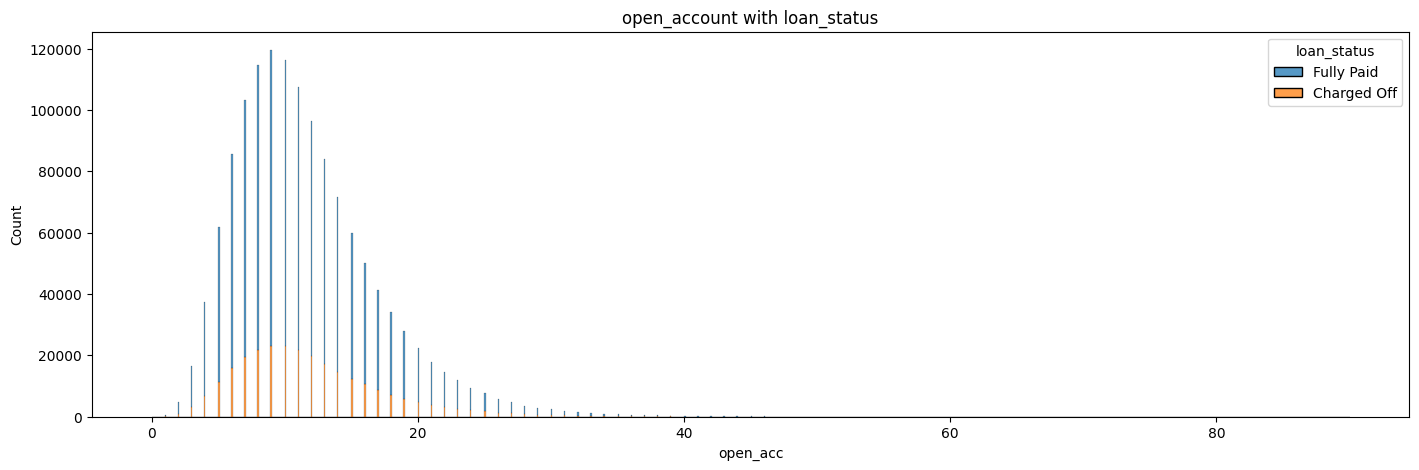

In [28]:
plt.figure(figsize = (17,5))
sns.histplot(data = data, x = 'open_acc', hue = 'loan_status', multiple = 'stack')
plt.title('open_account with loan_status')
plt.show()

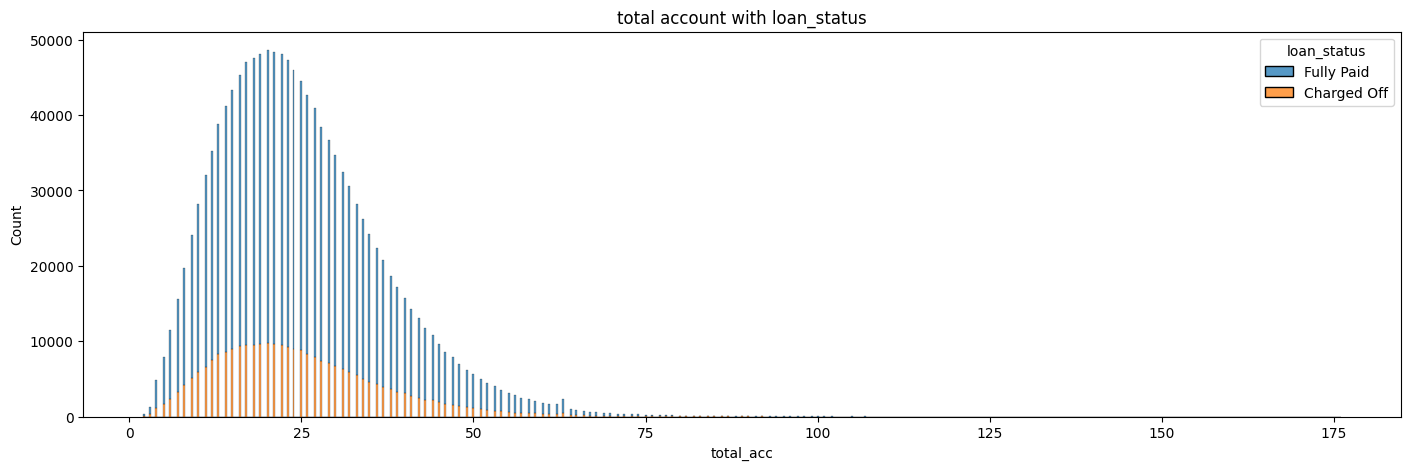

In [29]:
plt.figure(figsize = (17,5))
sns.histplot(data = data, x = 'total_acc', hue = 'loan_status', multiple = 'stack')
plt.title('total account with loan_status')
plt.show()

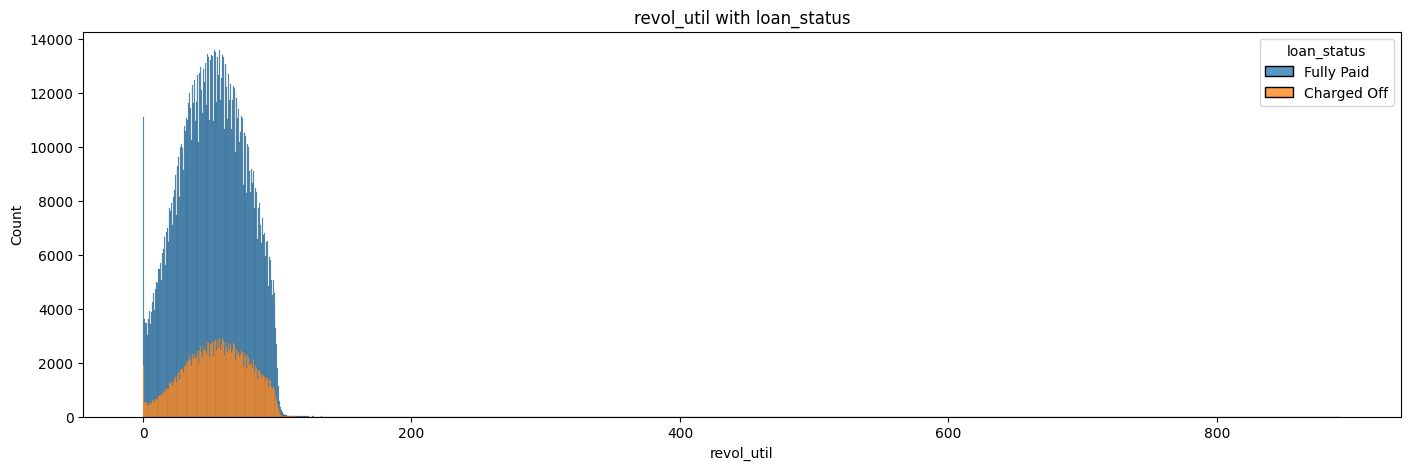

In [30]:
plt.figure(figsize = (17,5))
sns.histplot(data = data, x = 'revol_util', hue = 'loan_status', multiple = 'stack')
plt.title('revol_util with loan_status')
plt.show()

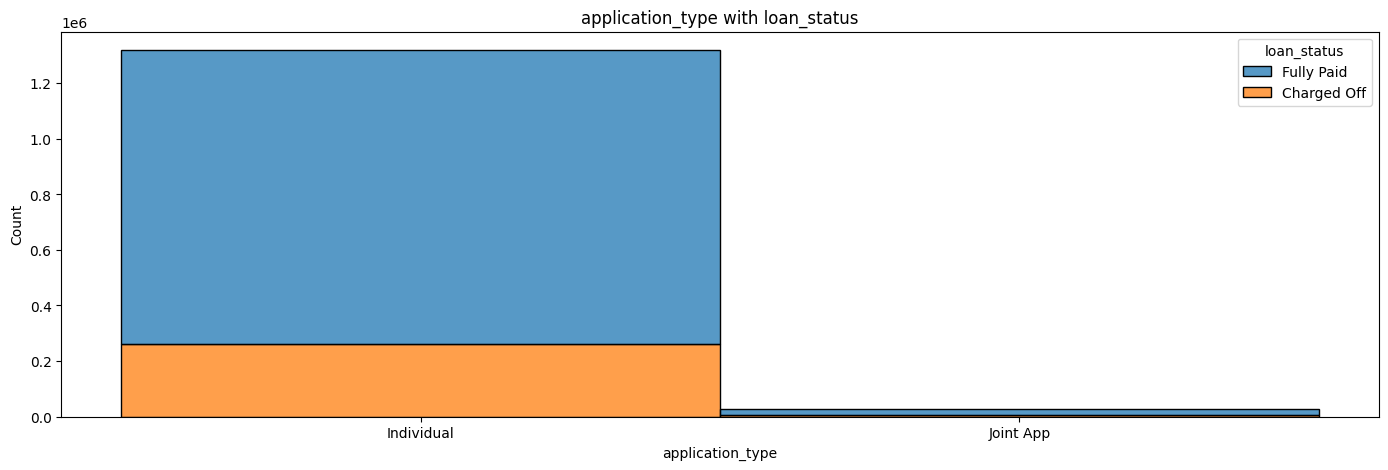

In [31]:
plt.figure(figsize = (17,5))
sns.histplot(data = data, x = 'application_type', hue = 'loan_status', multiple = 'stack')
plt.title('application_type with loan_status')
plt.show()

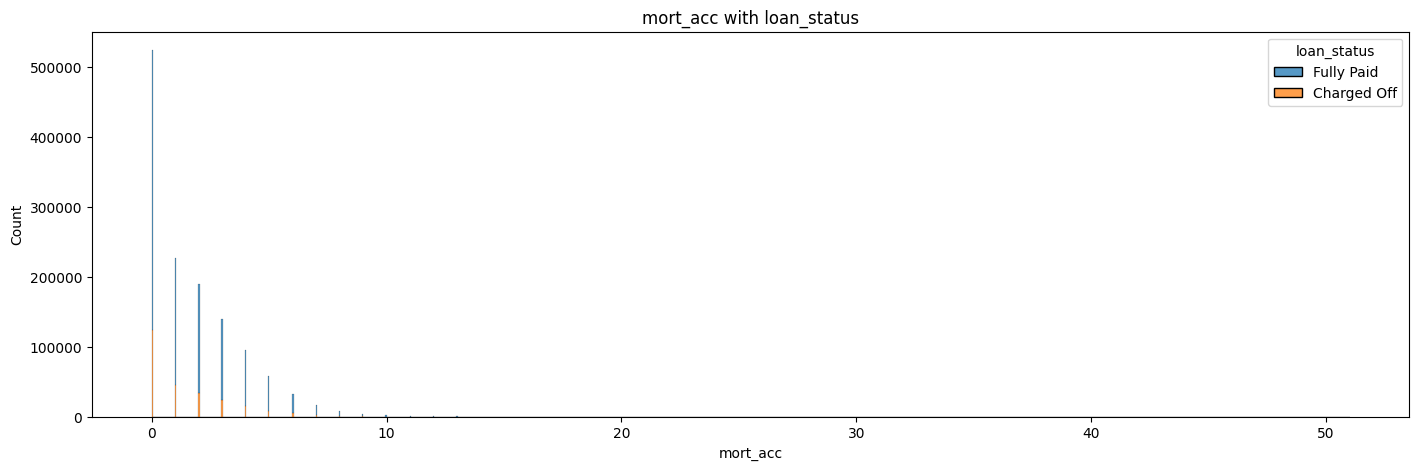

In [32]:
plt.figure(figsize = (17,5))
sns.histplot(data = data, x = 'mort_acc', hue = 'loan_status', multiple = 'stack')
plt.title('mort_acc with loan_status')
plt.show()

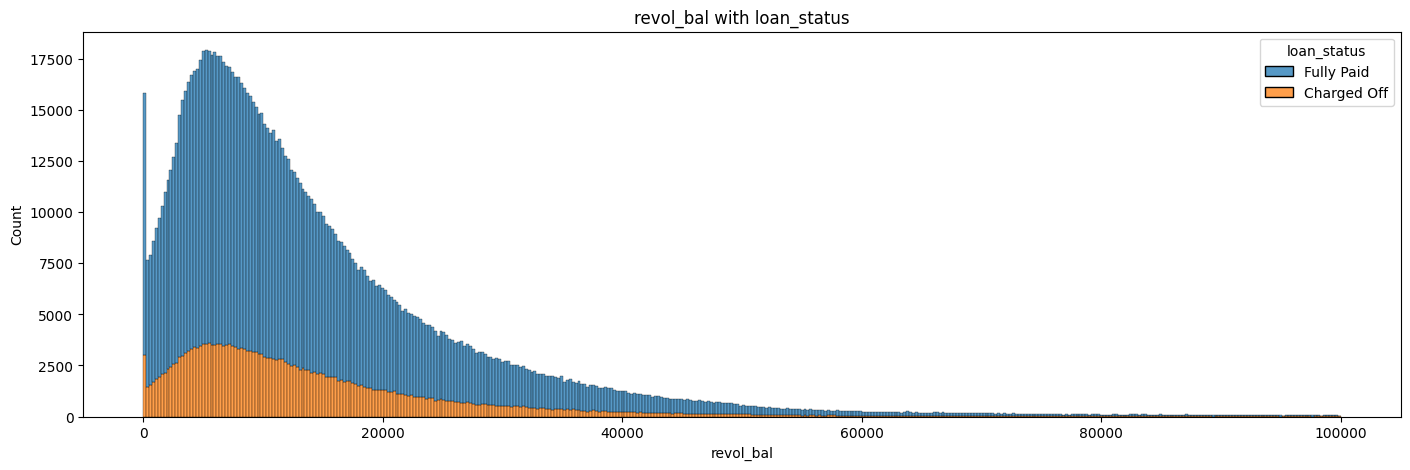

In [33]:
df = data[data['revol_bal'] <= 100000]
plt.figure(figsize = (17,5))
sns.histplot(data = df, x = 'revol_bal', hue = 'loan_status', multiple = 'stack')
plt.title('revol_bal with loan_status')
plt.show()

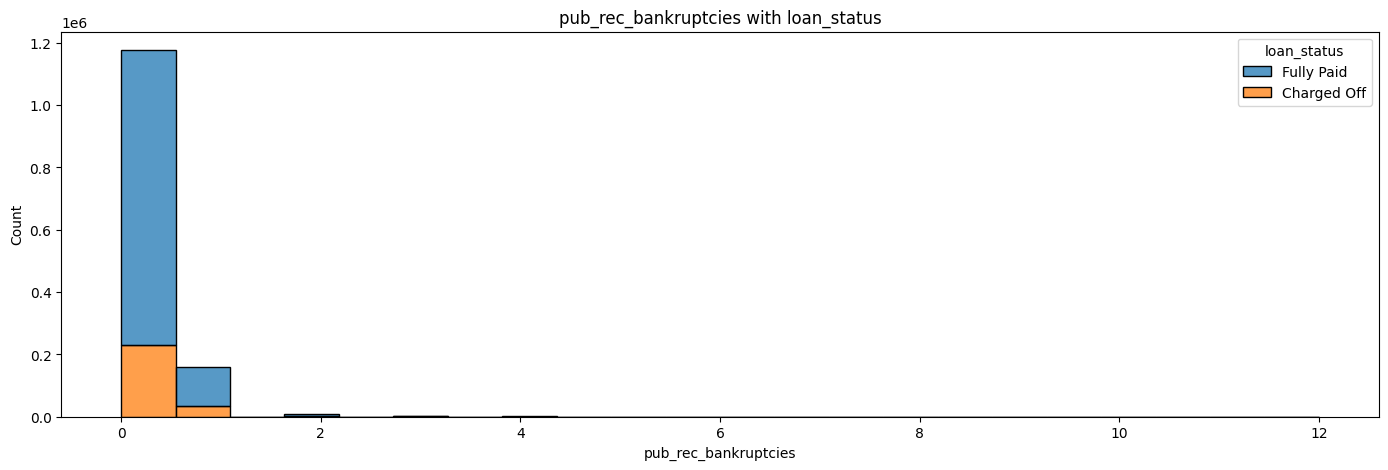

In [34]:
plt.figure(figsize = (17,5))
sns.histplot(data = data, x = 'pub_rec_bankruptcies', hue = 'loan_status', multiple = 'stack')
plt.title('pub_rec_bankruptcies with loan_status')
plt.show()

In [35]:
data['loan_status'] = data.loan_status.map({'Fully Paid' : 1, 'Charged Off' : 0})

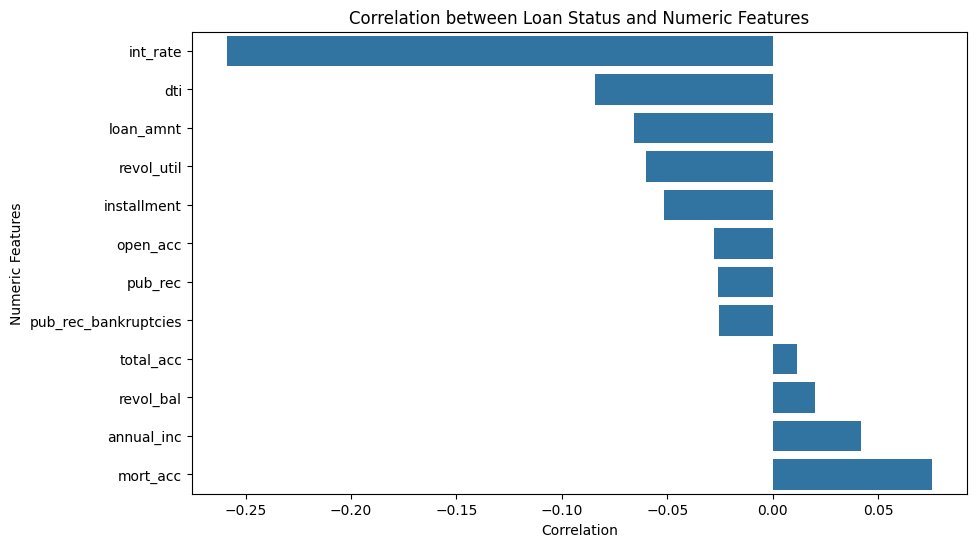

In [36]:
correlation = data.corr(numeric_only=True)['loan_status'].drop('loan_status').sort_values()

# Create a horizontal bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation, y=correlation.index, orient='h')


plt.xlabel('Correlation')
plt.ylabel('Numeric Features')
plt.title('Correlation between Loan Status and Numeric Features')

plt.show()

we can see that interest rate has highly postive correlation with loan_status

# Data Preprocessing

In [37]:
main_df = data.copy()

In [38]:
for i in main_df.columns:
    if data[i].isna().sum() != 0:
        missing = data[i].isna().sum()
        perc = (missing/ main_df.shape[0]) * 100
        print("percentage of null values in ", i , " : ", perc)

percentage of null values in  emp_title  :  6.376597215511666
percentage of null values in  emp_length  :  5.8359039923883715
percentage of null values in  title  :  1.2383762850198095
percentage of null values in  zip_code  :  7.433231002519866e-05
percentage of null values in  dti  :  0.027800283949424295
percentage of null values in  revol_util  :  0.06370278969159525
percentage of null values in  mort_acc  :  3.5145059503014178
percentage of null values in  pub_rec_bankruptcies  :  0.05180962008756346


In [39]:
main_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,1,debt_consolidation,Debt consolidation,190xx,PA,5.91,2003-08-01,7.0,0.0,2765.0,29.7,13.0,w,Individual,1.0,0.0
1,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,1,small_business,Business,577xx,SD,16.06,1999-12-01,22.0,0.0,21470.0,19.2,38.0,w,Individual,4.0,0.0
2,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,1,home_improvement,NaN,605xx,IL,10.78,2000-08-01,6.0,0.0,7869.0,56.2,18.0,w,Joint App,5.0,0.0
4,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,1,major_purchase,Major purchase,174xx,PA,25.37,1998-06-01,12.0,0.0,21929.0,64.5,35.0,w,Individual,6.0,0.0
5,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,RENT,34000.0,Source Verified,Dec-2015,1,debt_consolidation,Debt consolidation,300xx,GA,10.20,1987-10-01,5.0,0.0,8822.0,68.4,6.0,w,Individual,0.0,0.0


In [40]:
#removing "months" from term column
main_df['term'] = main_df['term'].apply(lambda x: int(x.split()[0]))

In [41]:
# removing emp title column
main_df = main_df.drop(columns = ['emp_title'])

In [42]:
#removing title column
main_df = main_df.drop(columns = ['title'])

In [43]:
#removing emp_length column
main_df = main_df.drop(columns = ['emp_length'])

In [44]:
##removing zipcode columne
main_df = main_df.drop(columns = ['zip_code'])

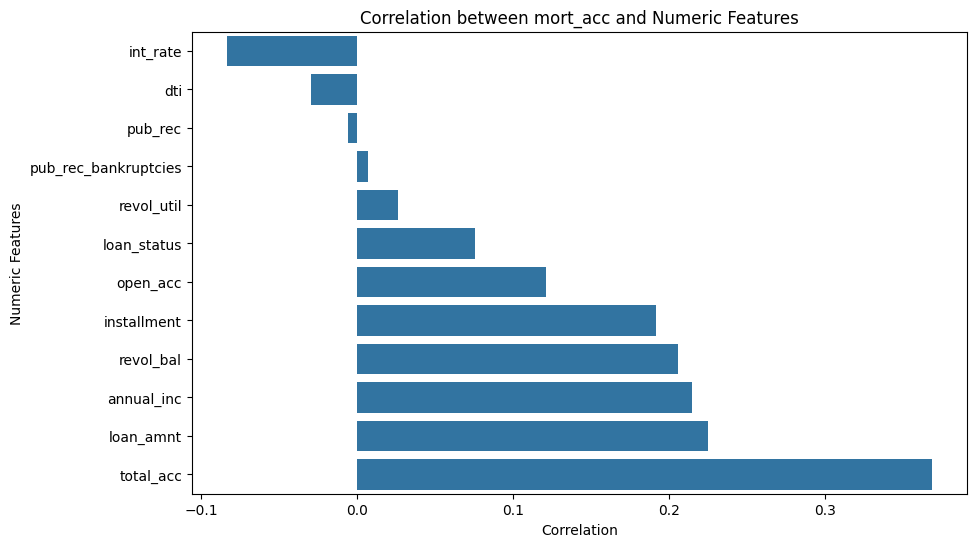

In [45]:
#mortage acc
correlation = data.corr(numeric_only=True)['mort_acc'].drop('mort_acc').sort_values()

# Create a horizontal bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation, y=correlation.index, orient='h')


plt.xlabel('Correlation')
plt.ylabel('Numeric Features')
plt.title('Correlation between mort_acc and Numeric Features')

plt.show()

A strong corr bw mort acc and total acc

In [46]:
'''pip install fancyimpute'''

'pip install fancyimpute'

In [47]:
#filling na of mort_acc by MICE
mice_imputer = IterativeImputer()
imputed_column = mice_imputer.fit_transform(main_df[['mort_acc']])
imputed_column_df = pd.DataFrame(imputed_column, columns=['mort_acc'])
main_df['mort_acc'] = imputed_column

In [48]:
main_df.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                     374
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              857
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    697
dtype: int64

for dti, banckruptcies and revol until have very less nan, we can drop the rows

In [49]:
main_df.dropna(inplace=True)

In [50]:
main_df.shape

(1343383, 24)

In [51]:
main_df.dtypes

loan_amnt                      float64
term                             int64
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                      int64
purpose                         object
addr_state                      object
dti                            float64
earliest_cr_line        datetime64[ns]
open_acc                       float64
pub_rec                        float64
revol_bal                      float64
revol_util                     float64
total_acc                      float64
initial_list_status             object
application_type                object
mort_acc                       float64
pub_rec_bankruptcies           float64
dtype: object

## Handling categorical variables

In [52]:
print([i for i in main_df.columns if main_df[i].dtype == object])

['grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'purpose', 'addr_state', 'initial_list_status', 'application_type']


In [53]:
main_df.drop(columns = ['grade'], axis = 1, inplace = True)

In [54]:
dummies = ['sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type']
main_df = pd.get_dummies(main_df, columns = dummies, drop_first = True)
main_df.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,addr_state,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_Joint App
0,3600.0,36,13.99,123.03,55000.0,Dec-2015,1,PA,5.91,2003-08-01,7.0,0.0,2765.0,29.7,13.0,1.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,24700.0,36,11.99,820.28,65000.0,Dec-2015,1,SD,16.06,1999-12-01,22.0,0.0,21470.0,19.2,38.0,4.0,0.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
2,20000.0,60,10.78,432.66,63000.0,Dec-2015,1,IL,10.78,2000-08-01,6.0,0.0,7869.0,56.2,18.0,5.0,0.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True
4,10400.0,60,22.45,289.91,104433.0,Dec-2015,1,PA,25.37,1998-06-01,12.0,0.0,21929.0,64.5,35.0,6.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
5,11950.0,36,13.44,405.18,34000.0,Dec-2015,1,GA,10.20,1987-10-01,5.0,0.0,8822.0,68.4,6.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False


In [55]:
#removing zipcode since we will use addr_state
main_df.drop(columns = ['addr_state'], axis = 1, inplace = True)

In [56]:
#removing issue_d as it will cause data leakage
main_df.drop('issue_d', axis=1, inplace=True)

In [57]:
#extracting only the year from earlist_cr_line
main_df['earliest_cr_line'] = main_df.earliest_cr_line.dt.year
main_df['earliest_cr_line'].nunique()

72

## Handling Outliers

In [58]:
main_df = main_df[main_df['annual_inc'] <= 250000]
main_df = main_df[main_df['dti'] <= 50]
main_df = main_df[main_df['open_acc'] <= 40]
main_df = main_df[main_df['total_acc'] <= 80]
main_df = main_df[main_df['revol_util'] <= 120]
main_df = main_df[main_df['revol_bal'] <= 250000]

In [59]:
main_df.shape

(1324019, 71)

In [60]:
main_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4',
       'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3',
       'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2',
       'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1',
       'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5',
       'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4',
       'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3',
       'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2',
       'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source V

In [61]:
main_df.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_Joint App
0,3600.0,36,13.99,123.03,55000.0,1,5.91,2003,7.0,0.0,2765.0,29.7,13.0,1.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,24700.0,36,11.99,820.28,65000.0,1,16.06,1999,22.0,0.0,21470.0,19.2,38.0,4.0,0.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
2,20000.0,60,10.78,432.66,63000.0,1,10.78,2000,6.0,0.0,7869.0,56.2,18.0,5.0,0.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True
4,10400.0,60,22.45,289.91,104433.0,1,25.37,1998,12.0,0.0,21929.0,64.5,35.0,6.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
5,11950.0,36,13.44,405.18,34000.0,1,10.20,1987,5.0,0.0,8822.0,68.4,6.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False


In [62]:
main_df.shape

(1324019, 71)

# Train Test Split

In [63]:
main_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4',
       'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3',
       'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2',
       'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1',
       'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5',
       'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4',
       'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3',
       'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2',
       'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source V

In [64]:
from sklearn.model_selection import train_test_split

# Train (70%) and Test (30%)
train, test = train_test_split(main_df, test_size=0.3, random_state=1, stratify=main_df['loan_status'])

# Train (85% of 70%) and Validation (15% of 70%)
train, val = train_test_split(train, test_size=0.15, random_state=1, stratify=train['loan_status'])

# Print the sizes
print(f"Train size: {train.shape}, Validation size: {val.shape}, Test size: {test.shape}")

Train size: (787791, 71), Validation size: (139022, 71), Test size: (397206, 71)


In [65]:
train.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_Joint App
708049,20625.0,36,10.75,672.80,43000.0,1,26.32,1983,10.0,0.0,19522.0,51.5,15.0,0.0,0.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
553225,12000.0,36,21.45,454.88,90000.0,1,6.68,2004,6.0,0.0,6107.0,94.0,15.0,2.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
741433,8000.0,36,13.67,272.15,45000.0,1,30.72,2000,9.0,0.0,14962.0,46.5,22.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1115636,9600.0,36,8.49,303.01,70000.0,1,16.42,1989,18.0,1.0,2812.0,25.3,45.0,3.0,1.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
254581,15000.0,60,14.65,354.10,84000.0,1,35.33,2003,17.0,0.0,5913.0,82.1,43.0,8.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [66]:
feature_columns = [col for col in train.columns if col != 'loan_status']
len(feature_columns)

70

In [67]:
X_train = train.drop(columns='loan_status')
y_train = train['loan_status']

X_val = val.drop(columns='loan_status')
y_val = val['loan_status']

X_test = test.drop(columns='loan_status')
y_test = test['loan_status']

In [68]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_columns)
# same transformation to validation and test sets (using the fitted scaler)
X_val_scaled = scaler.transform(X_val)  # Only transform, do not fit
X_test_scaled = scaler.transform(X_test)  # Only transform, do not fit

In [69]:
joblib.dump(scaler, 'standard.joblib')

['standard.joblib']

# XG Boost

In [70]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from scipy.stats import uniform, randint

In [72]:
param_dist = {
    'objective': ['binary:logistic'],
    'tree_method': ['gpu_hist'],  # 🚀 Enable GPU training
    'predictor': ['gpu_predictor'],  # Optional: use GPU for prediction too
    'eval_metric': ['auc'],
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'n_estimators': randint(50, 500),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 0.5),
    'min_child_weight': randint(1, 10)
}

xgb_model = xgb.XGBClassifier()

# RandomizedSearchCV with 5-fold cross-validation on the training set
random_search = RandomizedSearchCV(xgb_model, param_dist, n_iter=50, scoring='roc_auc', cv=5, random_state=42, n_jobs=-1)

# Fit the model using the training set
random_search.fit(X_train_scaled, y_train)

# Best hyperparameters found by RandomizedSearchCV
print(f"Best Parameters: {random_search.best_params_}")

f:\Projects\Default_risk_analysis\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:46:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
f:\Projects\Default_risk_analysis\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:46:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'colsample_bytree': np.float64(0.9711008778424264), 'eval_metric': 'auc', 'gamma': np.float64(0.28164410892276964), 'learning_rate': np.float64(0.12562495076197483), 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 435, 'objective': 'binary:logistic', 'predictor': 'gpu_predictor', 'subsample': np.float64(0.8421165132560784), 'tree_method': 'gpu_hist'}


In [73]:
best_model = random_search.best_estimator_
y_pred_probs_val = best_model.predict_proba(X_val_scaled)[:, 1]
auc_score_val = roc_auc_score(y_val, y_pred_probs_val)
print(f"Validation AUC Score: {auc_score_val}")

y_pred_probs_test = best_model.predict_proba(X_test_scaled)[:, 1]
auc_score_test = roc_auc_score(y_test, y_pred_probs_test)
print(f"Test AUC Score: {auc_score_test}")

f:\Projects\Default_risk_analysis\.venv\Lib\site-packages\xgboost\core.py:2676: UserWarning: [22:46:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
f:\Projects\Default_risk_analysis\.venv\Lib\site-packages\xgboost\core.py:729: UserWarning: [22:46:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(*

Validation AUC Score: 0.7212939656694626
Test AUC Score: 0.7200179978230442


# Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced', 'balanced_subsample']
}


rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,  # reduce to 10 if needed
    scoring='roc_auc',
    cv=3,  # 3-fold CV to reduce time
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)



best_rf = random_search.best_estimator_

# Predict probabilities on your validation set
y_val_pred_proba = best_rf.predict_proba(X_val)[:, 1]

# Calculate ROC AUC score
val_auc = roc_auc_score(y_val, y_val_pred_proba)

print(f"Best Parameters: {random_search.best_params_}")
print(f"Validation ROC AUC: {val_auc:.4f}")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': 'balanced_subsample'}
Validation ROC AUC: 0.7142


Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': 'balanced_subsample'}
Validation ROC AUC: 0.7142

In [73]:
import tensorflow as tf

In [78]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import roc_auc_score


In [79]:
def model_builder(hp):
    model = Sequential()

    # Tune the number of units
    hp_units = hp.Int('units', min_value=64, max_value=256, step=64)
    model.add(Dense(units=hp_units, activation='relu', input_shape=(X_train_scaled.shape[1],)))

    # Tune dropout
    hp_dropout = hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)
    model.add(Dropout(hp_dropout))

    # Optional second layer
    model.add(Dense(units=hp_units // 2, activation='relu'))
    model.add(Dropout(hp_dropout))

    model.add(Dense(1, activation='sigmoid'))

    # Tune optimizer
    hp_optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop'])
    model.compile(optimizer=hp_optimizer,
                  loss='binary_crossentropy',
                  metrics=[tf.keras.metrics.AUC(name='auc')])

    return model


In [80]:
tuner = kt.RandomSearch(
    model_builder,
    objective='val_auc',
    max_trials=10,  # Try 10 different combinations
    executions_per_trial=1,  # You can increase this for stability
    directory='keras_tuner_dir',
    project_name='credit_risk_ann'
)


f:\Projects\Default_risk_analysis\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [81]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

In [82]:
tuner.search(X_train_scaled, y_train,
             validation_data=(X_val_scaled, y_val),
             epochs=10,
             batch_size=256,
             class_weight=class_weight_dict,
             verbose=1)

Trial 10 Complete [00h 01m 08s]
val_auc: 0.7137691974639893

Best val_auc So Far: 0.716188371181488
Total elapsed time: 00h 09m 33s


In [83]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters:", best_hps.values)

# Build and train the best model
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train_scaled, y_train,
                         validation_data=(X_val_scaled, y_val),
                         epochs=15,
                         batch_size=256,
                         class_weight=class_weight_dict,
                         verbose=1)

# Evaluate on validation set
y_val_pred = best_model.predict(X_val_scaled).ravel()
auc = roc_auc_score(y_val, y_val_pred)
print(f"Validation AUC: {auc:.4f}")


Best hyperparameters: {'units': 192, 'dropout': 0.4, 'optimizer': 'adam'}


f:\Projects\Default_risk_analysis\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
3078/3078 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - auc: 0.6868 - loss: 0.6410 - val_auc: 0.7113 - val_loss: 0.6376
Epoch 2/15
3078/3078 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - auc: 0.7063 - loss: 0.6248 - val_auc: 0.7132 - val_loss: 0.6154
Epoch 3/15
3078/3078 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - auc: 0.7083 - loss: 0.6241 - val_auc: 0.7143 - val_loss: 0.6264
Epoch 4/15
3078/3078 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - auc: 0.7097 - loss: 0.6236 - val_auc: 0.7150 - val_loss: 0.6284
Epoch 5/15
3078/3078 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - auc: 0.7114 - loss: 0.6213 - val_auc: 0.7151 - val_loss: 0.6178
Epoch 6/15
3078/3078 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - auc: 0.7107 - loss: 0.6233 - val_auc: 0.7152 - val_loss: 0.6261
Epoch 7/15
3078/3078 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - auc: 0.7113 - loss: 0.6216 - val_auc: 0.7159 - val_loss: 0.6274
Epoch 8/15
3078/3078 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - auc: 0.7120 - loss: 0.6218 - val_auc: 0.7154 - val_loss: 0.6172
Epoch 9/15
3078/3078 ━━━━━━━━━━━━━━━━━━━

# XGBoost works the best with AUC score as 0.72

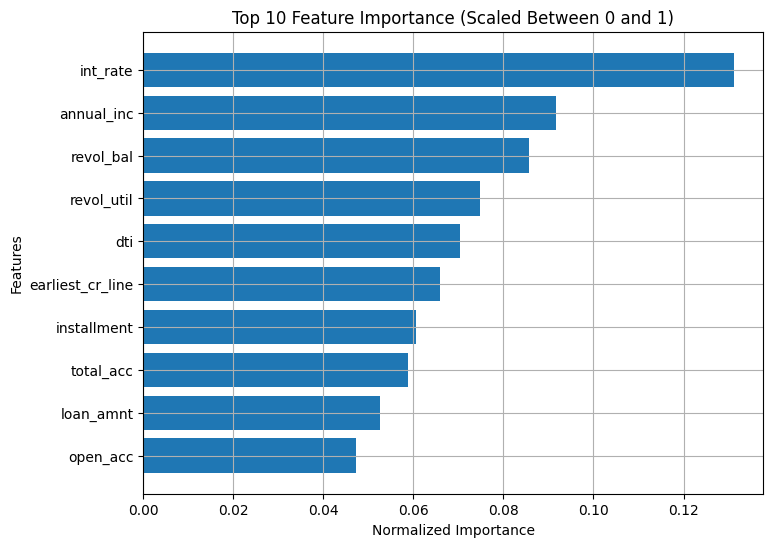

In [75]:
importance_dict = best_model.get_booster().get_score(importance_type='weight')

# Convert dictionary to a sorted list (descending order)
features, importance_values = zip(*sorted(importance_dict.items(), key=lambda x: x[1], reverse=True))

# Normalize importance scores between 0 and 1
importance_values = np.array(importance_values, dtype=np.float32)
normalized_importance = importance_values / np.sum(importance_values)

# Take only the **top 10** features
top_n = 10
top_features = features[:top_n]
top_normalized_importance = normalized_importance[:top_n]

# Plot normalized feature importance
plt.figure(figsize=(8, 6))
plt.barh(top_features, top_normalized_importance)
plt.xlabel("Normalized Importance")
plt.ylabel("Features")
plt.title(f"Top {top_n} Feature Importance (Scaled Between 0 and 1)")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.grid()
plt.show()